> **提示**：欢迎参加“调查数据集”项目！引用段会添加这类提示，来帮助你制定调查方法。在你提交项目之前，你可以浏览一下报告，将这一段删除，以保持报告的简洁性。首先，你需要双击该 Markdown 框(cell)，将标题更改为与数据集和调查相关的标题。

# 项目：TMDB调查数据集

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> **提示**：在报告的这一部分，你需要首先对已选择进行分析的数据集进行简要的介绍。在这一部分末尾，对你计划在报告过程中探索的问题进行描述。你需要建立至少包含一个因变量和三个自变量的分析报告。如果你不确定要问什么问题，请务必先熟悉数据集、数据集变量以及数据集上下文，以便确定要探索的问题。

> 如果尚未选择和下载数据，务必先进行这一步，再回到这里。如需在这个工作区中处理数据，还需要将其上传到工作区。因此，请单击左上角的 jupyter 图标，回到工作区目录。右上角有一个‘上传’按钮，可以将你的数据文件添加到工作区。然后单击 .ipynb 文件名，回到这里。

In [178]:
# 用这个框对你计划使用的所有数据包进行设置
# 导入语句
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 务必包含一个‘magic word’，以便将你的视图显示出来
%matplotlib inline

# magicwords的说明：
# http://ipython.readthedocs.io/en/stable/interactive/magics.html

<a id='wrangling'></a>
## 数据整理

> **提示**：在报告的这一部分中载入数据，检查简洁度，然后整理和清理数据集，以便进行分析。请务必将步骤仔细归档，并确定清理决策是否正确。

### 常规属性

In [179]:
# 加载数据并打印几行。进行这几项操作，来检查数据
df = pd.read_csv('tmdb-movies.csv')
print(df.columns)
# 看下都有哦那些列
df.head(50)
# 看下100行，可以粗略的看下NaN和各feature的情况

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [180]:
#  类型，以及是否有缺失数据或错误数据的情况
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [181]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [182]:
print(df.shape)
print(df.duplicated().sum())
df.drop_duplicates(inplace = True)
print(df.shape)
print(df.duplicated().sum())

(10866, 21)
1
(10865, 21)
0


In [183]:
df.isnull().sum()
round(df.isnull().sum()/df.shape[0],2)

id                      0.00
imdb_id                 0.00
popularity              0.00
budget                  0.00
revenue                 0.00
original_title          0.00
cast                    0.01
homepage                0.73
director                0.00
tagline                 0.26
keywords                0.14
overview                0.00
runtime                 0.00
genres                  0.00
production_companies    0.09
release_date            0.00
vote_count              0.00
vote_average            0.00
release_year            0.00
budget_adj              0.00
revenue_adj             0.00
dtype: float64

In [184]:
# plus分离genre
# set.union 待测试
# evernote里（uda论坛）里有用pandas.melt的方法

In [185]:
df.genres.head(3)

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
Name: genres, dtype: object

In [186]:
df1 = df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

> **提示**：_不应_在每个 notebook 框 (cell) 中进行太多操作。可以自由创建框，来进行数据探索。在这个项目中，可以在初始 notebook 中进行大量探索性操作。不要求对其进行组织，但请务必仔细阅读备注，理解每个代码框的用途。完成分析之后，你可以创建 notebook 副本，在其中去除多余数据，组织好你的每一步分析，从而形成信息连贯、结构紧密的报告。

> **提示**：请务必向你的读者告知你在调查中采取的步骤。在每个代码框或每组相关代码框后面，用 markdown 框对前面的框中的调查结果向读者进行说明。你需要尽量做到这一点，以便读者更好地理解后续框中的内容。

### 数据清理 清理无用列和调整homepage列

In [187]:
# 1 清理无用列
# buget \ revenue 使用adj调整后数值，丢弃
# imdb id 与 id作用相同，丢弃
# homepage 缺失很多，其中的内容
print(df.shape)
drop_list = ['budget', 'revenue', 'imdb_id']
df.drop(drop_list, axis = 1, inplace = True)
print(df.shape)
df.columns

(10865, 21)
(10865, 18)


Index(['id', 'popularity', 'original_title', 'cast', 'homepage', 'director',
       'tagline', 'keywords', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [188]:
# 2 调整列
# homepage 缺失很多，但突然想看看是不是有homepage的
# 有更加多的投入和收入（因为重视么）
# 显示最有一列是谁（碰巧了在最后就不用都输出了）
if 'homepage' in df.columns:
    df['has_homepage'] = df['homepage'].notnull()
    df.drop('homepage', axis = 1, inplace = True)
else:
    print('data already processed')
# 写了个小循环如果执行过就提示下不会报错
# 万一评审老师点了两次，报错了不是会很尴尬的
# 开玩笑了，提交项目是html文件，但是自己用起来方便
print(df.columns[-1:])
df.head()

Index(['has_homepage'], dtype='object')


,id,popularity,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,has_homepage
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,True
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,True
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,True
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,True
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,True


### Plus1 find key genres

In [189]:
# Plus1 - find key genres

# 清理genres 得到 genres-king
# 需要先删除空值，否则会报错
# https://stackoverflow.com/questions/42224700/attributeerror-float-object-has-no-attribute-split
print(df.shape)
df1 = df[df['genres'].notnull()]
df2 = df1.copy()
print(df1.shape)

(10865, 18)
(10842, 18)


In [190]:
# df1['genres-key'] = df1['genres'].apply(lambda x: x.split('|')[0])
## 上述有 copy 性质的操作需要使用 loc 来筛选, 否则会有 waring
df2['genres-key'] = df1['genres'].apply(lambda x: x.split('|')[0])

In [191]:
df1.head(1)

,id,popularity,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,has_homepage
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,True


In [192]:
df2['genres-key'] = df1['genres'].apply(lambda x: x.split('|')[0])

In [193]:
df2.head(1)

,id,popularity,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,has_homepage,genres-key
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,True,Action


In [194]:
# 使用loc的方式还有写问题，后续研究，先使用带warning的版本
# df1.loc[:,'gemres-key1'] = df1.loc[:,'genres'].apply(lambda x: x.split('|')[0])
## 通过对每一行的值进行 split 处理
## split(|) 是说分隔符是 |
## 最后的[0] 是说分离出来之后的第一个元素
# df1.loc[:,['genres-k']] = df1.genres.apply(lambda x: x.split('|')[0])
# df1.head(3)

In [195]:
# 复杂一些的解决方案
## 方便后续扩展
## count 不带排序参数需要串接 sort_values
df2.groupby('genres-key').count().sort_values(by='id',ascending=False)[:10]

,id,popularity,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,has_homepage
genres-key,,,,,,,,,,,,,,,,,,
Drama,2453,2453,2453,2449,2447,1721,2139,2453,2453,2453,2228,2453,2453,2453,2453,2453,2453,2453
Comedy,2319,2319,2319,2319,2313,1729,2001,2318,2319,2319,2087,2319,2319,2319,2319,2319,2319,2319
Action,1590,1590,1590,1589,1587,1284,1412,1590,1590,1590,1481,1590,1590,1590,1590,1590,1590,1590
Horror,915,915,915,915,914,763,779,915,915,915,853,915,915,915,915,915,915,915
Adventure,586,586,586,585,586,481,535,586,586,586,551,586,586,586,586,586,586,586
Thriller,491,491,491,491,491,399,416,491,491,491,474,491,491,491,491,491,491,491
Documentary,432,432,432,392,424,216,339,431,432,432,283,432,432,432,432,432,432,432
Animation,403,403,403,379,398,228,316,403,403,403,364,403,403,403,403,403,403,403
Crime,380,380,380,380,380,304,356,380,380,380,361,380,380,380,380,380,380,380


In [196]:
df2['genres-key'].value_counts()

Drama              2453
Comedy             2319
Action             1590
Horror              915
Adventure           586
Thriller            491
Documentary         432
Animation           403
Crime               380
Fantasy             272
Science Fiction     214
Romance             186
Family              144
Mystery             125
Music               100
TV Movie             78
War                  59
History              44
Western              42
Foreign               9
Name: genres-key, dtype: int64

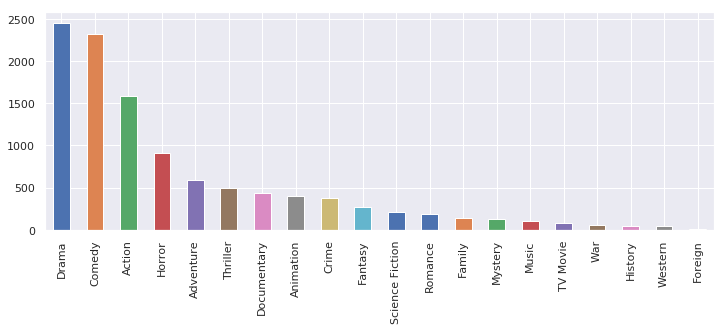

In [197]:
df2['genres-key'].value_counts().plot.bar(figsize=(12,4));

In [198]:
df2.groupby('genres-key')['popularity'].mean().nlargest(10)

genres-key
Adventure          1.217868
Science Fiction    1.073096
Fantasy            0.865390
Action             0.836394
Animation          0.810370
War                0.767041
History            0.764636
Family             0.730987
Romance            0.704157
Crime              0.694063
Name: popularity, dtype: float64

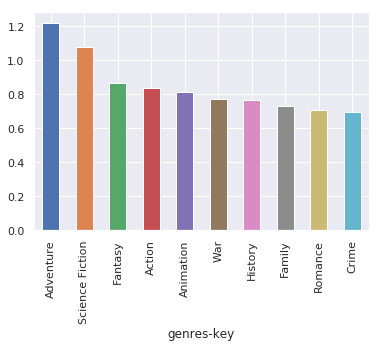

In [199]:
df2.groupby('genres-key')['popularity'].mean().nlargest(10).plot.bar();

In [200]:
df2['genres-key'].value_counts()

Drama              2453
Comedy             2319
Action             1590
Horror              915
Adventure           586
Thriller            491
Documentary         432
Animation           403
Crime               380
Fantasy             272
Science Fiction     214
Romance             186
Family              144
Mystery             125
Music               100
TV Movie             78
War                  59
History              44
Western              42
Foreign               9
Name: genres-key, dtype: int64

In [201]:
# Plus1 b
# 对每一种类型进行统计
genres_count = df2['genres-key'].value_counts()
print(genres_count)
type(genres_count), len(genres_count)

Drama              2453
Comedy             2319
Action             1590
Horror              915
Adventure           586
Thriller            491
Documentary         432
Animation           403
Crime               380
Fantasy             272
Science Fiction     214
Romance             186
Family              144
Mystery             125
Music               100
TV Movie             78
War                  59
History              44
Western              42
Foreign               9
Name: genres-key, dtype: int64


(pandas.core.series.Series, 20)

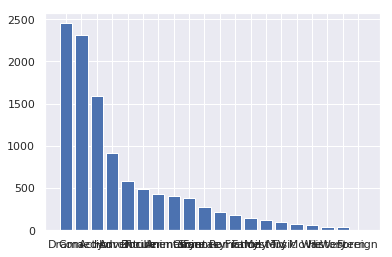

In [235]:
# genres_count.index 是说把上面输出的 index 作为 x, 即分类的名字
# genres_count 是把上面输出的值作为 y, 画出高度
plt.bar(genres_count.index, genres_count);

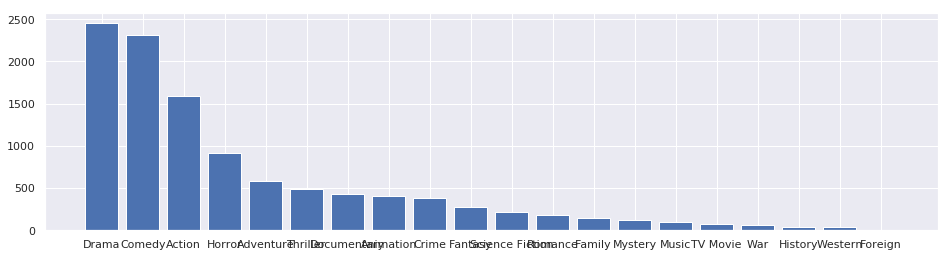

In [236]:
plt.figure(figsize=(16,4))
plt.bar(genres_count.index, genres_count);

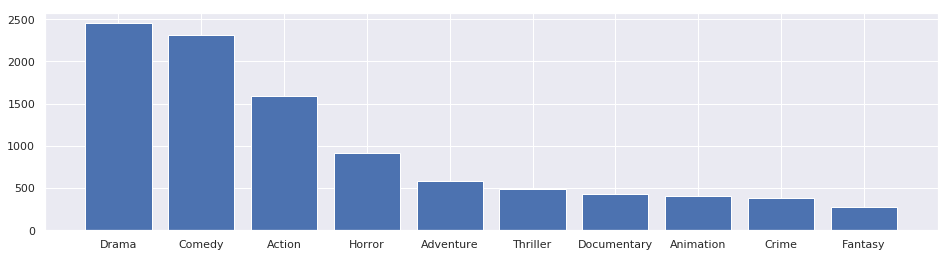

In [237]:
plt.figure(figsize=(16,4))
plt.bar(genres_count[:10].index, genres_count[:10]);

In [203]:
# Plus2 - think about benefit
# benefit = revenue - budget

# 创建 benefit 列
df1['benefit'] = df1['revenue_adj'] - df1['budget_adj']

# 计算 roi 列
df1['roi'] = df1['benefit'] / df1['budget_adj']

df1.head(5)

## Tips
# 不要在 lambda 行内对 dataframe 两列进行计算

/Users/francis/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/francis/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,popularity,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,has_homepage,benefit,roi
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,True,1.254446e+09,9.090192
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,True,2.101614e+08,1.522909
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,True,1.704191e+08,1.683984
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,True,1.718723e+09,9.340891
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,True,1.210949e+09,6.927628


In [204]:
# if need delete base on id
df1.shape

(10842, 20)

In [205]:
df1.query(' id == "135397"')

,id,popularity,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,has_homepage,benefit,roi
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,True,1.254446e+09,9.090192


In [206]:
df1.query(' id == "135397"').index

Int64Index([0], dtype='int64')

In [207]:
df2= df1.drop(df1.query(' id == "135397"').index)

In [208]:
df2.shape

(10841, 20)

<a id='eda'></a>
## 探索性数据分析

> **提示**在你完成数据整理和清理之后，现在可以进行探索性数据分析了。你需要计算统计值，创建可视化图表，解决你在一开始的简介部分中提出的研究问题。我们推荐你采用系统化方法。一次只探索一个变量，然后探索变量之间的关系。

### 研究问题 1 几数字值的关系如何

In [209]:
# 先把需要保留的列列出来
smlist = ['popularity','vote_average','budget_adj','revenue_adj']
# 制作一个新的数据用于scater matirx显示（否则太慢了，也看不太清）
dfsm = pd.DataFrame()
for i in smlist:
    dfsm[i] = df[i]
dfsm.head()

,popularity,vote_average,budget_adj,revenue_adj
0,32.985763,6.5,1.379999e+08,1.392446e+09
1,28.419936,7.1,1.379999e+08,3.481613e+08
2,13.112507,6.3,1.012000e+08,2.716190e+08
3,11.173104,7.5,1.839999e+08,1.902723e+09
4,9.335014,7.3,1.747999e+08,1.385749e+09


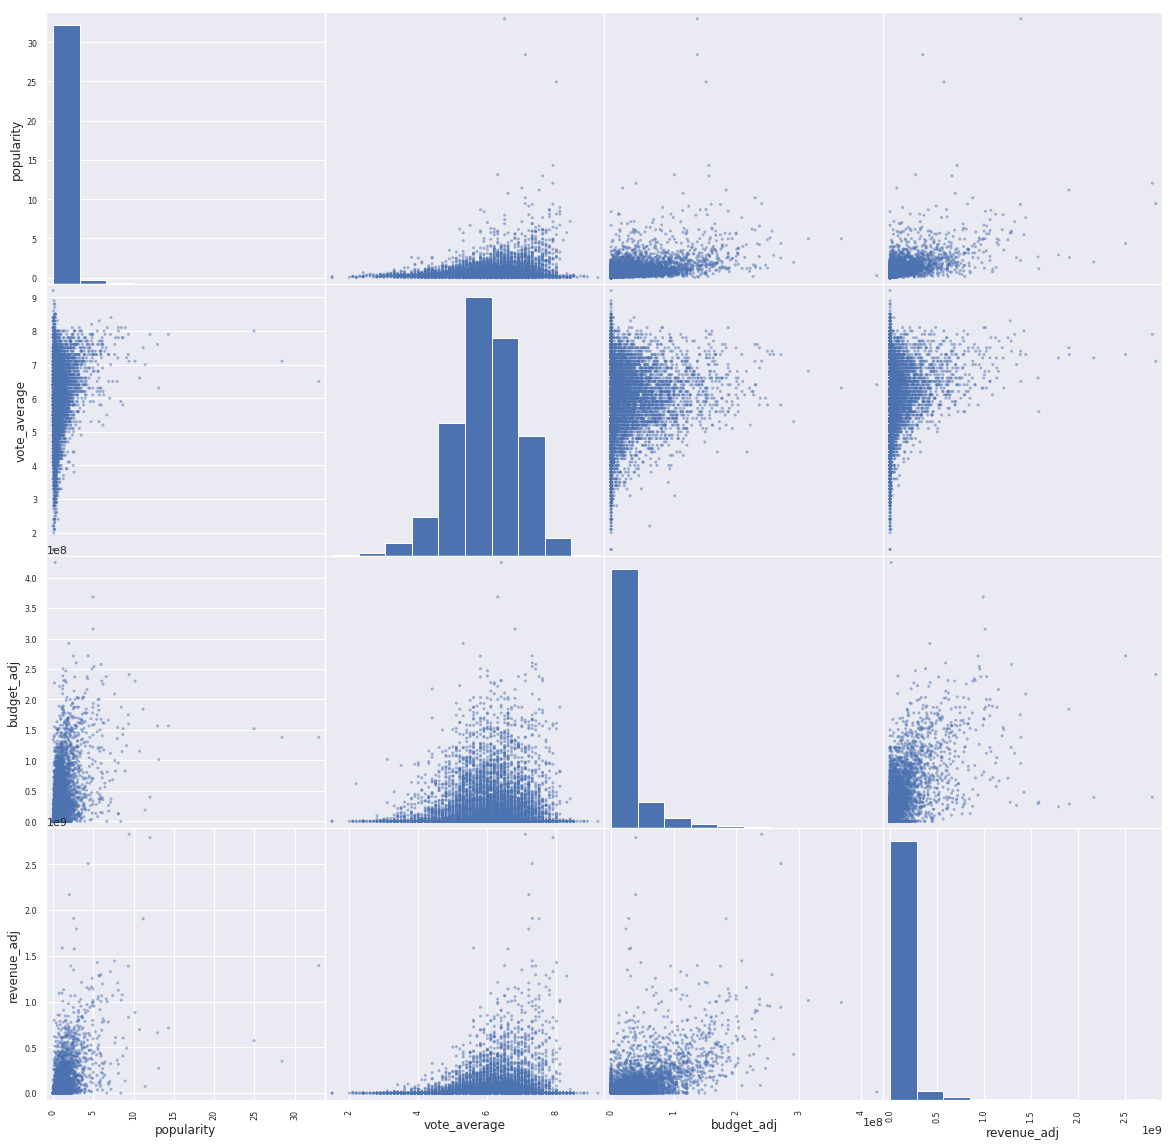

In [210]:
# OK 我们接下来就可以画个scater matrix图来看看了
pd.plotting.scatter_matrix(dfsm, figsize=(20,20));

In [211]:
# 画完图之后，发现有的图有个别值分布的特别大，此处应该考虑删除掉异常值（超纲了）

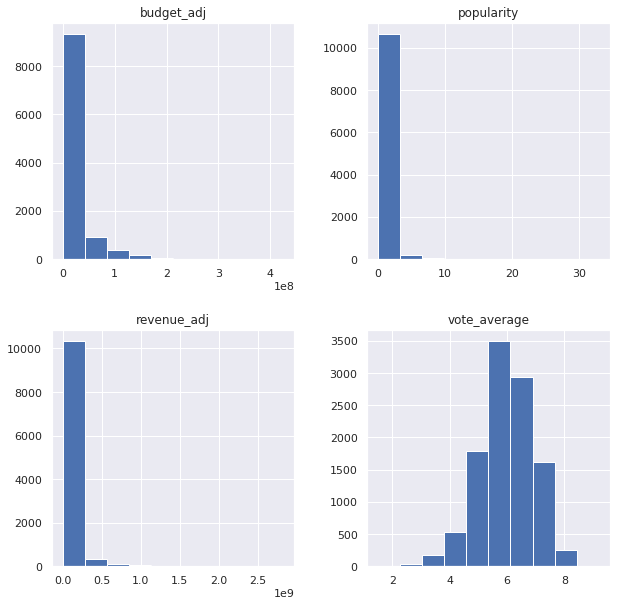

In [212]:
# 那么我们回来看下个个参数的分布
dfsm.hist(figsize=(10,10));

In [213]:
# 发现除了vote average之外，右侧都有少数超大值
dfsm.describe()

,popularity,vote_average,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,5.975012,1.754989e+07,5.136900e+07
std,1.000231,0.935138,3.430753e+07,1.446383e+08
min,0.000065,1.500000,0.000000e+00,0.000000e+00
25%,0.207575,5.400000,0.000000e+00,0.000000e+00
50%,0.383831,6.000000,0.000000e+00,0.000000e+00
75%,0.713857,6.600000,2.085325e+07,3.370173e+07
max,32.985763,9.200000,4.250000e+08,2.827124e+09


In [214]:
# 好奇怪 popu的几个数值都超低的，我来检查下
dfsm['popularity'].sort_values()
# 居然真的是很小

6181      0.000065
9977      0.000188
6080      0.000620
6551      0.000973
6961      0.001115
7268      0.001117
7256      0.001315
3370      0.001317
2874      0.001349
4948      0.001372
1918      0.001423
7267      0.001531
10592     0.001567
4919      0.001635
9593      0.001662
3369      0.001682
4947      0.001783
6553      0.001983
3910      0.002006
8053      0.002120
6079      0.002165
4945      0.002262
10219     0.002381
1385      0.002457
1910      0.002460
3365      0.002475
3368      0.002514
1328      0.002599
6078      0.002647
6077      0.002648
           ...    
8         7.404165
4361      7.637767
7         7.667400
2410      7.753899
3372      7.959228
2634      8.021423
4177      8.093754
3911      8.095275
636       8.110711
3371      8.411577
2875      8.466668
2633      8.575419
6         8.654359
635       8.691294
2409      8.947905
5         9.110700
4         9.335014
1919      9.363643
1386      9.432768
634      10.174599
633      10.739009
3        11.

In [215]:
# 检查百分位的值
# 那么我们查查几个百分位的数值吧，使用linspace每隔5%显示一下！
# dfsm['popularity'].quantile(np.linspace(0,1,21))
# linspace 是0到1的n个点之间的分割，因为有开始结束所以要增加1个，比如21
# 可以看出来过了只有15%的数值超过了1，Max真是太大了
# 这个数值画图意义也不是特别明显

# 干脆我们写个函数把其他的quantile也看一下
# 把平均分为几个作为n值输入
def vquantile(data, n):
    for i in data:
        quantile = data[i].quantile(np.linspace(0,1,n+1))
        print('\n', 'Checking:', i , '\n', quantile)

vquantile(dfsm, 10)


 Checking: popularity 
 0.0     0.000065
0.1     0.105703
0.2     0.174995
0.3     0.239447
0.4     0.305211
0.5     0.383831
0.6     0.477205
0.7     0.614380
0.8     0.861420
0.9     1.350770
1.0    32.985763
Name: popularity, dtype: float64

 Checking: vote_average 
 0.0    1.5
0.1    4.8
0.2    5.2
0.3    5.5
0.4    5.8
0.5    6.0
0.6    6.3
0.7    6.5
0.8    6.8
0.9    7.1
1.0    9.2
Name: vote_average, dtype: float64

 Checking: budget_adj 
 0.0    0.000000e+00
0.1    0.000000e+00
0.2    0.000000e+00
0.3    0.000000e+00
0.4    0.000000e+00
0.5    0.000000e+00
0.6    4.462259e+06
0.7    1.404050e+07
0.8    2.904090e+07
0.9    5.812285e+07
1.0    4.250000e+08
Name: budget_adj, dtype: float64

 Checking: revenue_adj 
 0.0    0.000000e+00
0.1    0.000000e+00
0.2    0.000000e+00
0.3    0.000000e+00
0.4    0.000000e+00
0.5    0.000000e+00
0.6    9.646989e+05
0.7    1.866223e+07
0.8    5.653684e+07
0.9    1.484086e+08
1.0    2.827124e+09
Name: revenue_adj, dtype: float64


In [216]:
# 根据上面的输出，发现budget有很多空的，特别不靠谱，我要干掉它们
print(len(dfsm[dfsm['budget_adj'] == 0]))
print(dfsm.shape)
# 干脆把budget和revenue的空值都干掉
dfsm5k = dfsm[(dfsm['revenue_adj'] != 0)&(dfsm['budget_adj'] != 0)]
dfsm5k.shape

5696
(10865, 4)


(3854, 4)

In [217]:
# 干掉了60%的数据，实际处理时候要慎重，不过数值就好看多了
# ps：同时也要小心对数据好看的追求，不要太极端了多删了数据
print(vquantile(dfsm5k, 10))


 Checking: popularity 
 0.0     0.001117
0.1     0.269882
0.2     0.402532
0.3     0.520429
0.4     0.647226
0.5     0.797511
0.6     0.988009
0.7     1.215634
0.8     1.610403
0.9     2.452755
1.0    32.985763
Name: popularity, dtype: float64

 Checking: vote_average 
 0.0    2.2
0.1    5.2
0.2    5.5
0.3    5.8
0.4    6.0
0.5    6.2
0.6    6.4
0.7    6.6
0.8    6.8
0.9    7.2
1.0    8.4
Name: vote_average, dtype: float64

 Checking: budget_adj 
 0.0    9.693980e-01
0.1    4.612144e+06
0.2    1.029637e+07
0.3    1.617956e+07
0.4    2.229130e+07
0.5    3.001611e+07
0.6    3.816024e+07
0.7    5.162149e+07
0.8    7.114803e+07
0.9    1.031006e+08
1.0    4.250000e+08
Name: budget_adj, dtype: float64

 Checking: revenue_adj 
 0.0    2.370705e+00
0.1    3.173294e+06
0.2    1.273700e+07
0.3    2.439926e+07
0.4    3.976059e+07
0.5    6.173068e+07
0.6    8.889753e+07
0.7    1.320855e+08
0.8    2.033811e+08
0.9    3.538761e+08
1.0    2.827124e+09
Name: revenue_adj, dtype: float64
None


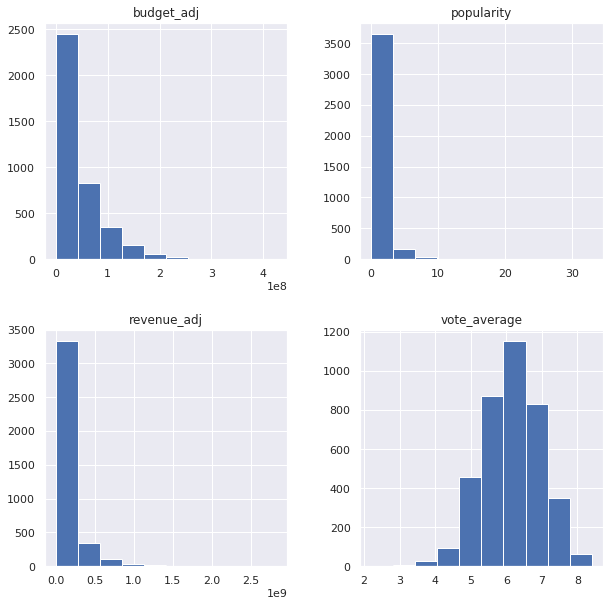

In [218]:
# 来个hist再看看
dfsm5k.hist(figsize=(10,10));
# 好看多了

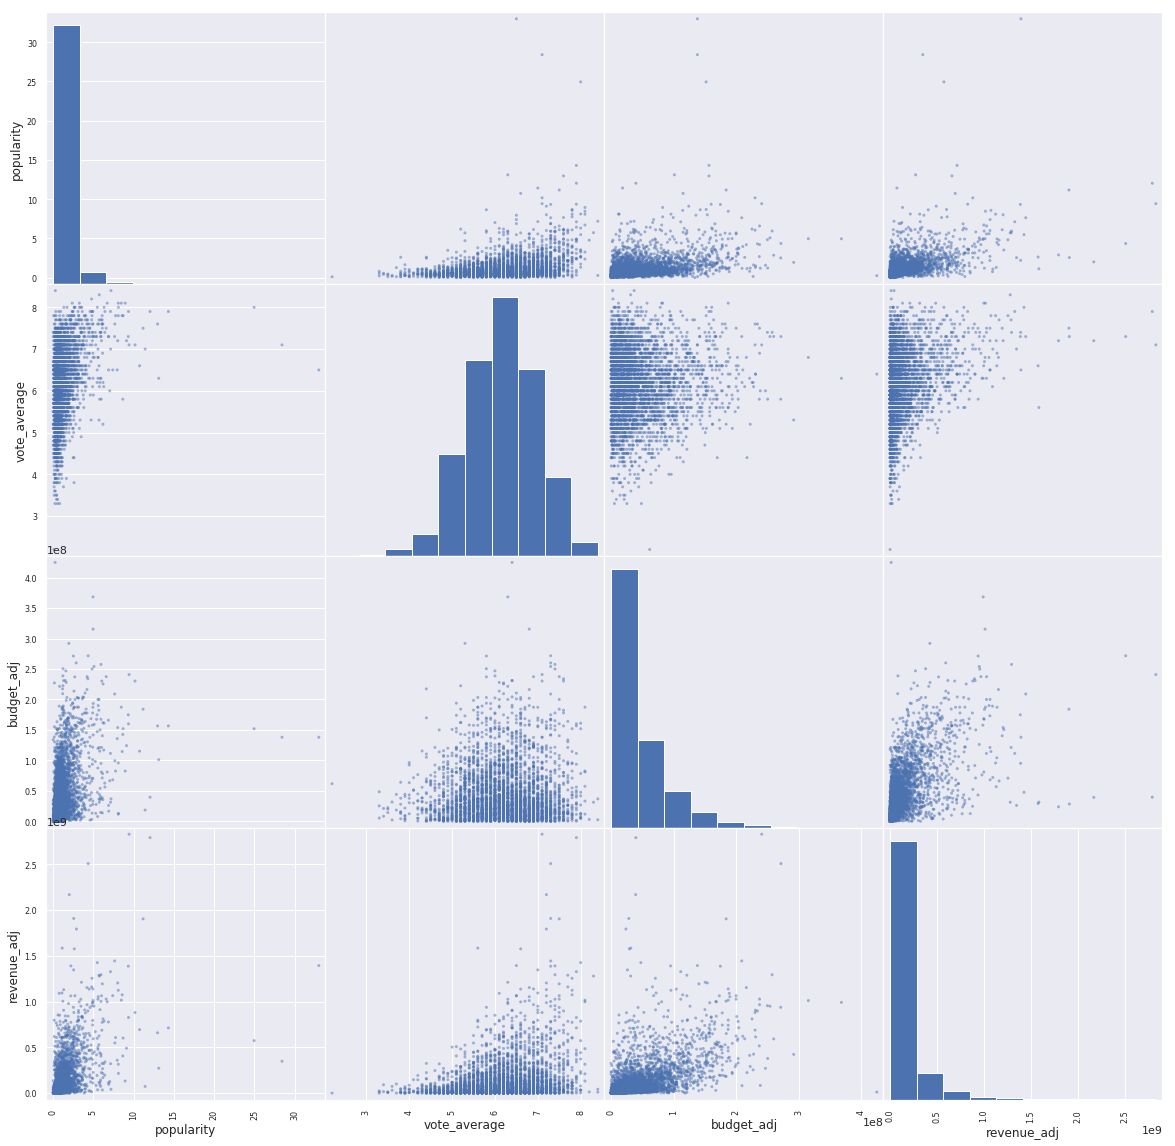

In [219]:
# 再看看scater
pd.plotting.scatter_matrix(dfsm5k, figsize=(20,20));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


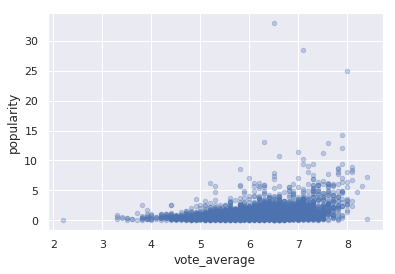

In [220]:
# 发现1 vote 和 pop有关系的
dfsm5k.plot(x='vote_average',
            y='popularity', kind='scatter', alpha=0.3);
# 要不要美化一下，少年？

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


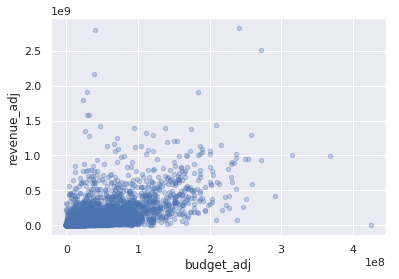

In [221]:
# 发现2 budget 和 revenue有一些关系，但是没有那么明显
dfsm5k.plot(x='budget_adj',
            y='revenue_adj', kind='scatter', alpha=0.3);

In [222]:
dfsm.head()

,popularity,vote_average,budget_adj,revenue_adj
0,32.985763,6.5,1.379999e+08,1.392446e+09
1,28.419936,7.1,1.379999e+08,3.481613e+08
2,13.112507,6.3,1.012000e+08,2.716190e+08
3,11.173104,7.5,1.839999e+08,1.902723e+09
4,9.335014,7.3,1.747999e+08,1.385749e+09


In [223]:
dfsm5k.head()

,popularity,vote_average,budget_adj,revenue_adj
0,32.985763,6.5,1.379999e+08,1.392446e+09
1,28.419936,7.1,1.379999e+08,3.481613e+08
2,13.112507,6.3,1.012000e+08,2.716190e+08
3,11.173104,7.5,1.839999e+08,1.902723e+09
4,9.335014,7.3,1.747999e+08,1.385749e+09


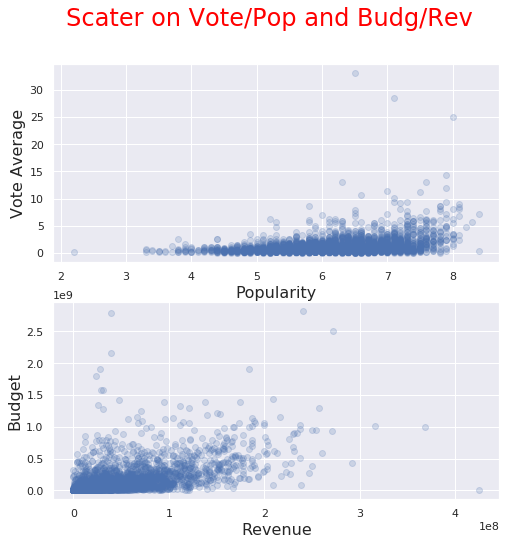

In [224]:
# 最后的图：
# # 先是设定图纸和图画位置
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# # 把数据加载到图中
x1 = dfsm5k['vote_average']
y1 = dfsm5k['popularity']
x2 = dfsm5k['budget_adj']
y2 = dfsm5k['revenue_adj']

ax1.scatter(x1, y1, color = 'b', alpha = 0.2, label = "All")
ax2.scatter(x2, y2, color = 'b', alpha = 0.2, label = "All")

# # label、title等的细化
ax1.set_ylabel('Vote Average', fontsize = 16)
ax1.set_xlabel('Popularity', fontsize = 16)
ax2.set_ylabel('Budget', fontsize = 16)
ax2.set_xlabel('Revenue', fontsize = 16)

fig.suptitle('Scater on Vote/Pop and Budg/Rev',
             fontsize = 24, color = 'red');

# # 其实散点图是可以把分组加进去的（比如homepage有没有）找到一个：
# # https://pythonspot.com/en/tag/scatter-plot/
# # 大家有需要的可以试试

### 研究问题2 是否有Website和Feature的关系

In [225]:
# 继续使用删除了budget和rev为0的（和钱都没关系的不分析了吧）
smlist2 = ['popularity','vote_average','budget_adj','revenue_adj', 'has_homepage']
# 制作一个新的数据用于scater matirx显示（否则太慢了，也看不太清）
dfsm2 = pd.DataFrame()
for i in smlist2:
    dfsm2[i] = df[i]
dfsm2.head()

,popularity,vote_average,budget_adj,revenue_adj,has_homepage
0,32.985763,6.5,1.379999e+08,1.392446e+09,True
1,28.419936,7.1,1.379999e+08,3.481613e+08,True
2,13.112507,6.3,1.012000e+08,2.716190e+08,True
3,11.173104,7.5,1.839999e+08,1.902723e+09,True
4,9.335014,7.3,1.747999e+08,1.385749e+09,True


In [226]:
# 接下来一样干掉空值的项
# 根据上面的输出，发现budget有很多空的，特别不靠谱，我要干掉它们
print(len(dfsm2[dfsm2['budget_adj'] == 0]))
print(dfsm2.shape)

# 干脆把revenue的空值也干掉
dfsm25k = dfsm2[(dfsm2['revenue_adj'] != 0)&(dfsm2['budget_adj'] != 0)]
dfsm25k.shape

5696
(10865, 5)


(3854, 5)

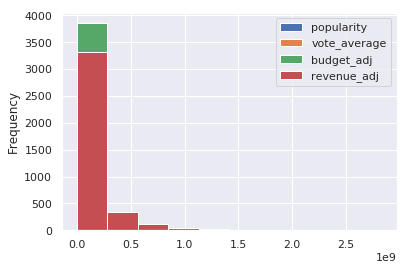

In [227]:
dfsm25k.plot.hist();
# 放一起严重不靠谱，bin的设置被最大的带坏了
# hist就是要一列一列看才行

In [228]:
# 来个hist再看看
# dfsm25k.hist();
# 看看True和False还是按照0和1处理的，而且数量分布不错，嗨森！
## 第三方库版本更新造成报错，否则这种方法是每个列输出一个直方图

In [229]:
mean = dfsm25k.groupby('has_homepage').mean()
mean
# 可以看出来区别还是很大的

,popularity,vote_average,budget_adj,revenue_adj
has_homepage,,,,
False,0.905837,6.112521,3.993240e+07,1.089843e+08
True,1.678034,6.262903,5.157438e+07,1.848763e+08


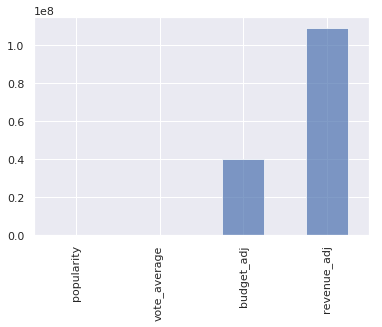

In [230]:
# 我们来画图试试，结果相差太多，前两个基本看不到啊
dfsm25k.groupby('has_homepage').mean().iloc[0].plot(
    kind = 'bar', alpha = 0.7, color = 'b');

In [231]:
# 把数据都搞到一个数量级好了
mean_edited = mean.copy()
# 需要注意如果不用.copy()的话修改mean_edited 也会修改mean
mean_edited['budget_adj'] = mean['budget_adj'] / 10000000
mean_edited['revenue_adj'] = mean['revenue_adj'] / 10000000
mean_edited
## 后续,可以考虑用log转换试试

,popularity,vote_average,budget_adj,revenue_adj
has_homepage,,,,
False,0.905837,6.112521,3.993240,10.898425
True,1.678034,6.262903,5.157438,18.487626


In [232]:
mean_edited.iloc[1] / mean_edited.iloc[0]
# 我们来看看变化有多少，pop和rev的增幅都超过了50%

popularity      1.852468
vote_average    1.024602
budget_adj      1.291542
revenue_adj     1.696358
dtype: float64

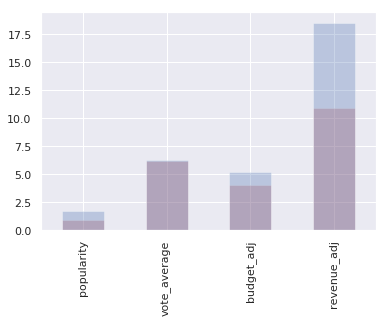

In [233]:
# 堆叠起来看看，不是特别理想
mean_edited.iloc[0].plot(kind = 'bar', color = 'r', alpha = 0.3)
mean_edited.iloc[1].plot(kind = 'bar', color = 'b', alpha = 0.3);

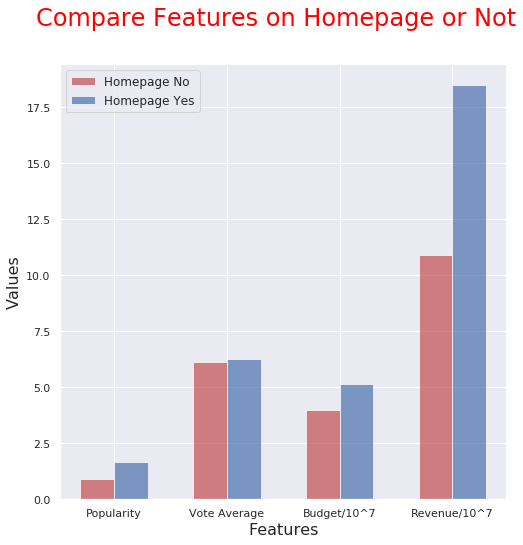

In [234]:
# 那只好认真的画图了，开始想到了折线图，但是这4个指标没有延续的关系
# 折线图比较适合画x轴为时间的数据
sns.set(context = 'notebook', style = 'darkgrid')
# 使用sns设置底色要放在最前面
fig = plt.figure(figsize=(8,8))
# 如果使用是import的是matplotlib 而不是 matplotlib.pyplot
# 调用的时候会有区别
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(mean_edited.iloc[0]))
# 要想微调位置要设置个变量ind
w = 0.3
# bar的宽度也是可以设定的
ax.bar(ind, mean_edited.iloc[0], color = 'r',
       alpha = 0.7, width = w, label = "Homepage No")
ax.bar(ind+w, mean_edited.iloc[1], color = 'b',
       alpha = 0.7, width = w, label = "Homepage Yes")
#ind是bar的位置，datared是输入的数据，多个width是bar的宽度
ax.legend(loc = 'best', fontsize = 12)
ax.set_xticks(ind+w/2)
# 设定x轴标签位置，在正中间
# 根据你要堆叠的数据设定
mean_lable = ['Popularity','Vote Average',
              'Budget/10^7', 'Revenue/10^7']
# 把标签设定为比较友好的方式
# 也可以导出index处理，比写死了好，有没有兴趣优化一下？
ax.set_xticklabels(mean_lable)
# 将分类标签作为x标签

ax.set_ylabel('Values', fontsize = 16)
ax.set_xlabel('Features', fontsize = 16)
fig.suptitle('Compare Features on Homepage or Not',
             fontsize = 24, color = 'red');
# 记住在最后的语句后面加个；就不会显示图之外的信息，比较友好

<a id='conclusions'></a>
## 结论

> **提示**：最后，你需要总结自己的调查结果。请确保你了解在探索过程中的局限性。如果尚未进行任何统计检验，不要做出任何统计结论。切记不要根据相关关系贸然推导出因果关系！

> **提示**：如果你对自己的研究成果感到满意，应将其副本保存为 HTML 或 PDF 形式。在导出报告之前请检查一遍，确保报告结构完整，信息连贯。应删除所有类似的“提示”引用段，以保持报告中的简洁度。在提交之前，你还需要查看在课程结尾的项目提交页面中的项目审阅规范。

> 如需将报告导出到工作区，你可以运行下面的代码框。如果正确，会返回代码 0，工作区目录下会生成 .html 文件（单击左上角的 jupyter 图标）。也可以通过 **文件** > **下载为** 子菜单下载 html 报告，然后手动上传到工作区目录。完成之后，可以单击右下角的“提交项目”，来提交你的项目。恭喜你！

### 研究问题 1 几个值为数字的值关系如何

### 研究问题 2 电影是否有Website和revenue以及budget的关系